# Load and Preprocess the Dataset

In [1]:
import pandas as pd
import csv

# Define a function to clean up the subthemes
def clean_subthemes(subthemes):
    if pd.isnull(subthemes) or subthemes.strip() == '':  # Check if the subthemes is NaN or empty
        return []
    subthemes = subthemes.split(',')
    subthemes = [subtheme.strip() for subtheme in subthemes if subtheme]  # Remove empty strings and strip whitespace
    return subthemes

# Read the CSV file using the csv module with QUOTE_MINIMAL
data = []
with open('Evaluation-dataset.csv', 'r') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        if len(row) > 1:
            review = row[0].strip()
            subthemes = ','.join(row[1:]).strip()  # Join the remaining parts as subthemes
        else:
            review = row[0].strip()
            subthemes = ""
        data.append([review, subthemes])

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['review', 'subthemes'])

# Clean up the subthemes
df['subthemes'] = df['subthemes'].apply(clean_subthemes)

# Display the cleaned DataFrame
print(df)


                                                  review  \
0      Tires where delivered to the garage of my choi...   
1      Easy Tyre Selection Process, Competitive Prici...   
2             Very easy to use and good value for money.   
3                  Really easy and convenient to arrange   
4      It was so easy to select tyre sizes and arrang...   
...                                                  ...   
10127  I ordered the wrong tyres, however [REDACTED] ...   
10128  Good experience, first time I have used [REDAC...   
10129  I ordered the tyre I needed on line, booked a ...   
10130  Excellent service from point of order to fitti...   
10131  Seamless, well managed at both ends. I would r...   

                                               subthemes  
0      [garage service positive, ease of booking posi...  
1      [garage service positive, value for money posi...  
2                             [value for money positive]  
3                             [ease of book

# Preprocess the Review Text

In [2]:
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# Load SpaCy model for lemmatization
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

# Define a function to clean up the subthemes
def clean_subthemes(subthemes):
    if pd.isnull(subthemes) or subthemes.strip() == '':  # Check if the subthemes is NaN or empty
        return []
    subthemes = subthemes.split(',')
    subthemes = [subtheme.strip() for subtheme in subthemes if subtheme]  # Remove empty strings and strip whitespace
    return subthemes

# Define a function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(tokens))]
    return ' '.join(lemmatized_tokens)

# Read the CSV file using the csv module with QUOTE_MINIMAL
data = []
with open('Evaluation-dataset.csv', 'r') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        if len(row) > 1:
            review = row[0].strip()
            subthemes = ','.join(row[1:]).strip()  # Join the remaining parts as subthemes
        else:
            review = row[0].strip()
            subthemes = ""
        data.append([review, subthemes])

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['review', 'subthemes'])

# Clean up the subthemes
df['subthemes'] = df['subthemes'].apply(clean_subthemes)

# Apply preprocessing to the review column
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Display the cleaned DataFrame
print(df)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sasanksasi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  review  \
0      Tires where delivered to the garage of my choi...   
1      Easy Tyre Selection Process, Competitive Prici...   
2             Very easy to use and good value for money.   
3                  Really easy and convenient to arrange   
4      It was so easy to select tyre sizes and arrang...   
...                                                  ...   
10127  I ordered the wrong tyres, however [REDACTED] ...   
10128  Good experience, first time I have used [REDAC...   
10129  I ordered the tyre I needed on line, booked a ...   
10130  Excellent service from point of order to fitti...   
10131  Seamless, well managed at both ends. I would r...   

                                               subthemes  \
0      [garage service positive, ease of booking posi...   
1      [garage service positive, value for money posi...   
2                             [value for money positive]   
3                             [ease of 

# Extract Subthemes and Sentiments

In [3]:
# Extract and print all unique subthemes
unique_subthemes = set()
for subthemes_list in df['subthemes']:
    unique_subthemes.update(subthemes_list)

print("All unique subthemes:")
for subtheme in unique_subthemes:
    print(subtheme)

All unique subthemes:
advisor/agent service positive
wait time positive
ease of booking positive
clean reception area and free coffee
ease of booking negative
booking confusion negative
length of fitting negative
keep it up! Will definitely buy from you again.
no issues
extra charges negative
refund negative
staff were courteous
call wait time negative
change of time negative
change of time positive
no stock negative
value for money positive
slick delivery service and good fitter.
it feels more transparent than buying from a mechanic based on their opinion.
Garage was quick & efficient with fitting of tyres
refund timescale negative
incorrect tyres sent negative
balancing negative
tyre agedot code positive
length of fitting positive
simple booking for fitting procedure.
good range and competitive prices on website
facilities positive
extra charges positive
only 8 as the garage was unable to fit the tyres in the allotted time and I had to wait over an hour.
recommended a great local sho

In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Extended predefined list of subthemes (keywords) with variations
predefined_subthemes = [
    'excellent service', 'garage service', 'ease of booking', 'value for money',
    'delivery punctuality', 'refund', 'location', 'length of fitting',
    'customer service', 'price', 'quality', 'convenience', 'selection process',
    'competitive pricing', 'no complaints', 'thank you', 'good service',
    'polite staff', 'great prices', 'good prices', 'well managed', 'recommend'
]

# Define a function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(tokens))]
    return ' '.join(lemmatized_tokens)

# Define a function to extract subthemes from text using predefined list
def extract_subthemes(text):
    subthemes = []
    for subtheme in predefined_subthemes:
        if subtheme.lower() in text.lower():
            subthemes.append(subtheme)
    return subthemes

# Define a function to analyze sentiment
def analyze_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Define a function to perform subtheme sentiment analysis
def subtheme_sentiment_analysis(text):
    subthemes = extract_subthemes(text)
    sentiments = {}
    for subtheme in subthemes:
        # Check the whole text sentiment if the subtheme is mentioned
        sentiment = analyze_sentiment(text)
        sentiments[subtheme] = sentiment
    if not sentiments:  # If no subthemes found, assign default sentiment
        sentiments['neutral'] = 'neutral'
    return sentiments

# Read the CSV file using the csv module with QUOTE_MINIMAL
data = []
with open('Evaluation-dataset.csv', 'r') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        if len(row) > 1:
            review = row[0].strip()
            subthemes = ','.join(row[1:]).strip(',')  # Remove trailing commas
        else:
            review = row[0].strip()
            subthemes = ""
        data.append([review, subthemes])

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['review', 'subthemes'])

# Apply preprocessing to the review column
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Apply subtheme sentiment analysis to the cleaned review column
df['subtheme_sentiments'] = df['cleaned_review'].apply(subtheme_sentiment_analysis)

print(df)

                                                  review  \
0      Tires where delivered to the garage of my choi...   
1      Easy Tyre Selection Process, Competitive Prici...   
2             Very easy to use and good value for money.   
3                  Really easy and convenient to arrange   
4      It was so easy to select tyre sizes and arrang...   
...                                                  ...   
10127  I ordered the wrong tyres, however [REDACTED] ...   
10128  Good experience, first time I have used [REDAC...   
10129  I ordered the tyre I needed on line, booked a ...   
10130  Excellent service from point of order to fitti...   
10131  Seamless, well managed at both ends. I would r...   

                                               subthemes  \
0       garage service positive,ease of booking positive   
1       garage service positive,value for money positive   
2                               value for money positive   
3                               ease of

# Evaluation 


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Apply your approach to the test dataset
test_pred = test_df['cleaned_review'].apply(subtheme_sentiment_analysis)

# Convert the predicted sentiments to a list of labels
test_true = []
test_labels = []
for review, subthemes in zip(test_df['review'], test_df['subthemes']):
    true_label = analyze_sentiment(review)
    test_true.append(true_label)
    pred = subtheme_sentiment_analysis(review)
    test_labels.append(list(pred.values())[0])

# Calculate precision, recall, and F1-score
precision = precision_score(test_true, test_labels, average='weighted')
recall = recall_score(test_true, test_labels, average='weighted')
f1 = f1_score(test_true, test_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9389038007686257
Recall: 0.5974346324617662
F1-score: 0.6875254030280584


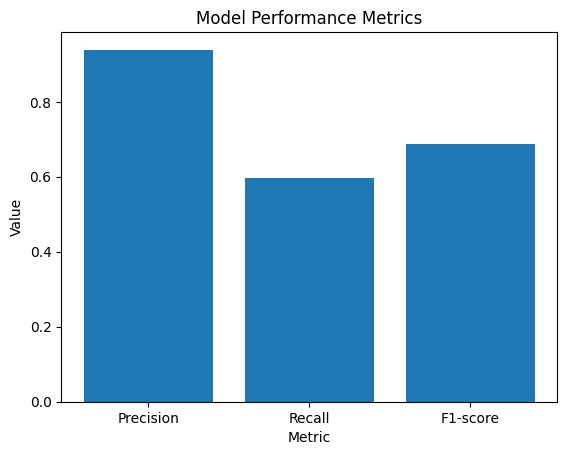

In [12]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Define the metrics and their values
metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

# Create a bar chart
ax.bar(metrics, values)

# Set the title and labels
ax.set_title('Model Performance Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Show the plot
plt.show()

In [13]:
import plotly.express as px

# Create a figure
fig = px.bar(x=metrics, y=values, title='Model Performance Metrics', labels={'x': 'Metric', 'y': 'Value'})

# Show the plot
fig.show()